In [1]:
from utils import *
import numpy as np 
import matplotlib.pyplot as plt
train_labels_aug, train_data_aug = data_aug(sample_per_class= 10000, mode = 'reduced')
test_labels_aug, test_data_aug = data_aug(sample_per_class= 1000, mode = 'reduced')



0  Train error: 8.60%  Test error: 8.13% 
1  Train error: 14.33%  Test error: 14.87% 
2  Train error: 0.88%  Test error: 0.60% 
3  Train error: 0.32%  Test error: 0.30% 
4  Train error: 0.13%  Test error: 0.23% 
5  Train error: 0.07%  Test error: 0.07% 
6  Train error: 0.02%  Test error: 0.07% 
7  Train error: 0.01%  Test error: 0.00% 
8  Train error: 0.01%  Test error: 0.00% 
9  Train error: 0.00%  Test error: 0.00% 
Final Train error: 0.00%  Test error: 0.00% 


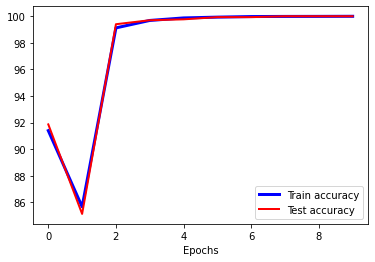

In [3]:
# Building and training the Model 
from mlp import MLP
from train import train_model
import matplotlib.pyplot as plt

train_images= torch.tensor(train_data_aug).view(-1,1,28,28).float()
train_labels=convert_to_one_hot_labels(train_images, torch.tensor(train_labels_aug))

test_images=torch.tensor(test_data_aug).view(-1,1,28,28).float()
test_labels=convert_to_one_hot_labels(test_images, torch.tensor(test_labels_aug))

# Normalization of the data 
mu, std = train_images.mean(), train_images.std()
train_images.sub_(mu).div_(std)

# Normalization of the data 
mu, std = test_images.mean(), test_images.std()
test_images.sub_(mu).div_(std)

perm=torch.randperm(train_labels.shape[0])
train_labels=train_labels[perm]
train_images=train_images[perm, : , :, :]

model = MLP()

train_error,test_error=train_model(model, train_images, train_labels,
                                   test_images, test_labels, 
                                    mini_batch_size = 1000 , nb_epochs =10, verbose=1)


# Plotting the accuracy 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 100-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 100-test_error, color='red', linewidth=2,label='Test accuracy')
ax.set_xlabel('Epochs')
ax.legend()
plt.show()

In [19]:
plot=0
if plot==1:
    for i in range(10):
        plt.imshow(train_images[i,0,:,:], cmap= 'gray')
        _,labels=train_labels[i,:].max(dim=0)
        plt.title(labels.item())
        plt.show()

In [9]:
from utils import *
import numpy as np 
import matplotlib.pyplot as plt

train_labels_aug, train_data_aug = data_aug(sample_per_class= 20000)
test_labels_aug, test_data_aug = data_aug(sample_per_class= 1000)

image_shape = (28, 28)
train_set_size = 60000
test_set_size = 6000


train_images_path = 'train/train-images-idx3-ubyte.gz'
train_labels_path = 'train/train-labels-idx1-ubyte.gz'
test_images_path ='train/t10k-images-idx3-ubyte.gz'
test_labels_path = 'train/t10k-labels-idx1-ubyte.gz'

train_images = extract_data(train_images_path, image_shape, train_set_size)
test_images = extract_data(test_images_path, image_shape, test_set_size)
train_labels = extract_labels(train_labels_path, train_set_size)
test_labels = extract_labels(test_labels_path, test_set_size)

train_images=torch.tensor(np.concatenate((train_images,train_data_aug ))).view(-1,1,28,28)
test_images=torch.tensor(np.concatenate((test_images,test_data_aug ))).view(-1,1,28,28)
train_labels=torch.tensor(np.concatenate((train_labels,train_labels_aug)))
test_labels=torch.tensor(np.concatenate((test_labels, test_labels_aug)))

# One hot encoding of the labels
train_labels=convert_to_one_hot_labels(train_images, train_labels)
test_labels=convert_to_one_hot_labels(test_images, test_labels)

perm=torch.randperm(train_labels.shape[0])
train_labels=train_labels[perm]
train_images=train_images[perm, : , :, :]


perm2=torch.randperm(test_labels.shape[0])
test_labels=test_labels[perm2]
test_images=test_images[perm2, : , :, :]

# Normalization of the data 
mu, std = train_images.mean(), train_images.std()
train_images.sub_(mu).div_(std);

# Normalization of the data 
mu, std = test_images.mean(), test_images.std()
test_images.sub_(mu).div_(std);

In [2]:
plot=0
if plot==1:
    for i in range(50): #test_images.size(0)):
        plt.imshow(test_images[i,0,:,:], cmap= 'gray')
        _,labels=test_labels[i,:].max(dim=0)
        plt.title(labels.item())
        plt.show()

In [12]:
# Building and training the Model 
from mlp2 import MLP
from train import train_model
import matplotlib.pyplot as plt



model = MLP()

test_images=torch.tensor(test_data_aug).view(-1,1,28,28).float()
test_labels=convert_to_one_hot_labels(test_images, torch.tensor(test_labels_aug))
mu, std = test_images.mean(), test_images.std()
test_images.sub_(mu).div_(std)

train_error,test_error=train_model(model, train_images, train_labels,
                                   test_images, test_labels, 
                                    mini_batch_size = 100, nb_epochs = 25, verbose=1)

# Plotting the accuracy 
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(0,train_error.shape[0]), 100-train_error, color='blue', linewidth=3,label='Train accuracy')
ax.plot(range(0,test_error.shape[0]), 100-test_error, color='red', linewidth=2,label='Test accuracy')
ax.set_xlabel('Epochs')
ax.legend()
plt.show()

0  Train error: 11.22%  Test error: 2.17% 
1  Train error: 6.44%  Test error: 1.47% 
2  Train error: 5.14%  Test error: 1.20% 


KeyboardInterrupt: 